In [1]:
!pip install imgaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 4.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 8.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:001 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
from matplotlib import pyplot as plt

torch.Size([3, 512, 512])


TypeError: Invalid shape (3, 512, 512) for image data

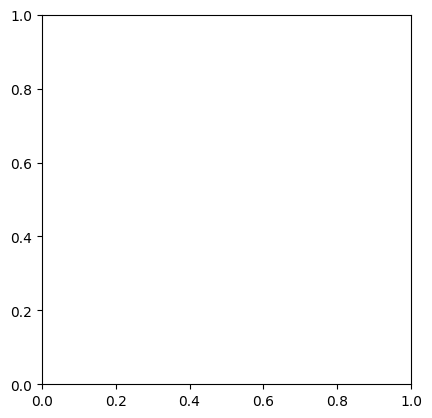

In [6]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        transforms.ToTensor()
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
print(transformed_image.shape)
plt.imshow(transformed_image)

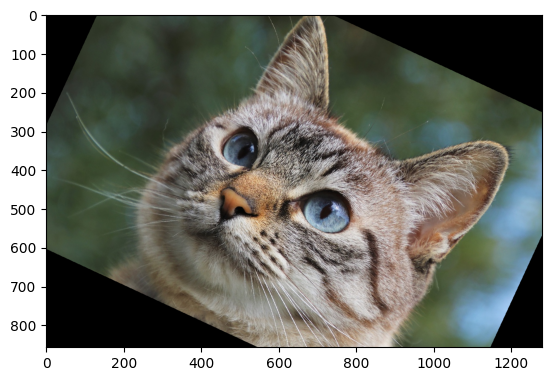

In [15]:
from PIL import Image
from torchvision import transforms

### 회전 및 대칭

transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),     # 50% 확률로 대칭 수행
        transforms.RandomVerticalFlip(p=0.5)
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

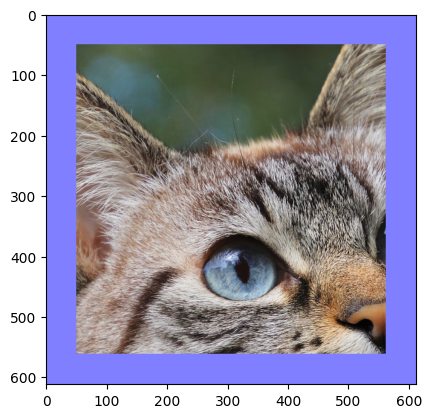

In [16]:
from PIL import Image
from torchvision import transforms

### 자르기 및 패딩

transform = transforms.Compose(
    [
        transforms.RandomCrop(size=(512, 512)),
        transforms.Pad(padding=50, fill=(127, 127, 255), padding_mode="constant")
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

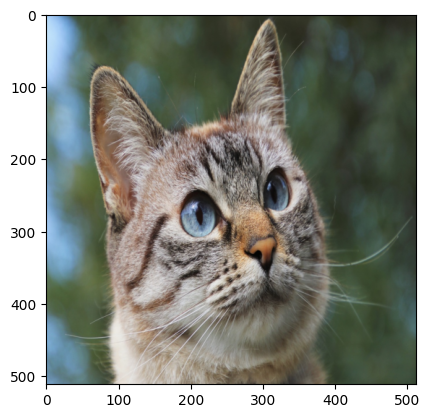

In [18]:
from PIL import Image
from torchvision import transforms

### 크기 조정

transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512))
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

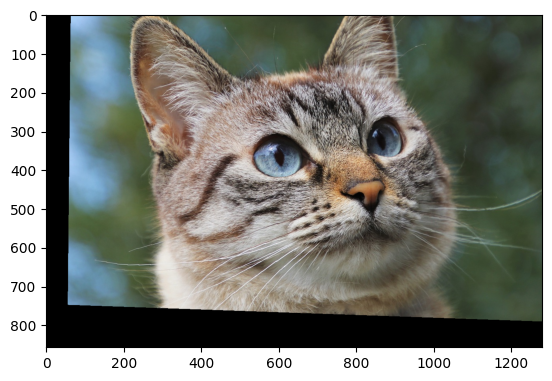

In [20]:
from PIL import Image
from torchvision import transforms

### 변형

transform = transforms.Compose(
    [
        transforms.RandomAffine(
            degrees=15, translate=(0.2, 0.2),
            scale=(0.8, 1.2), shear=15
        )
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

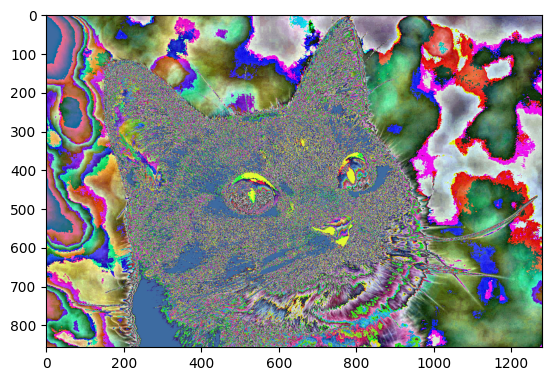

In [21]:
from PIL import Image
from torchvision import transforms

### 색상 변환

transform = transforms.Compose(
    [
        transforms.ColorJitter(
            brightness=0.3, contrast=0.3,   # 명도, 대비
            saturation=0.3, hue=0.3         # 채도, 색상
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean = [0.485, 0.456, 0.406],
            std = [0.229, 0.224, 0.225]
        ),
        transforms.ToPILImage()
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

In [28]:
import numpy as np
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa

### 노이즈

class IaaTransforms:
    def __init__(self):
        self.seq = iaa.Sequential([
            iaa.SaltAndPepper(p=(0.03, 0.07)),
            iaa.Rain(speed=(0.3, 0.7))
        ])
    
    def __call__(self, images): 
        images = np.array(images)
        print(images.shape, images.dtype)
        augmented = self.seq.augment_image(images)
        return Image.fromarray(augmented)


transform = transforms.Compose([
    IaaTransforms()
])

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

(857, 1280, 3) uint8


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

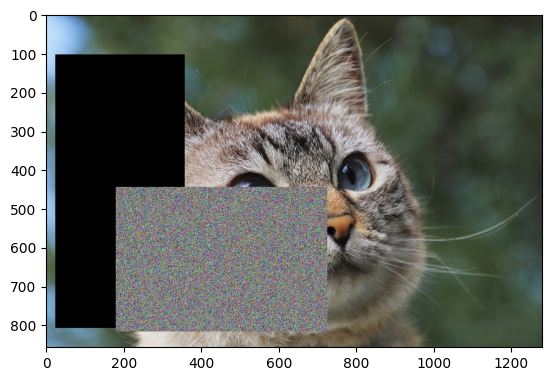

In [32]:
from PIL import Image
from torchvision import transforms

### 컷아웃 및 무작위 지우기

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, value=0),
    transforms.RandomErasing(p=1.0, value='random'),
    transforms.ToPILImage()
])

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

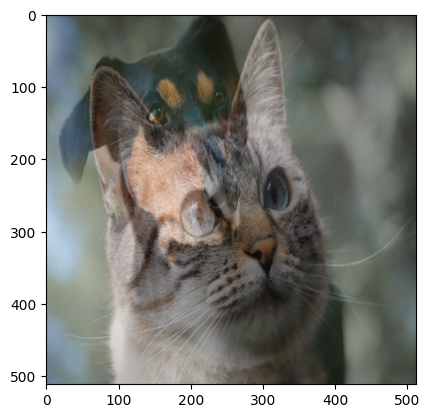

In [33]:
import numpy as np
from PIL import Image
from torchvision import transforms

### 혼합 및 컷믹스

class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target
        self.scale  = scale
        self.alpha  = alpha
        self.beta   = beta

    def __call__(self, image):
        image     = np.array(image)
        target    = self.target.resize(self.scale)
        target    = np.array(target)
        mix_image = image * self.alpha + target * self.beta
        return Image.fromarray(mix_image.astype(np.uint8))


transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open("../datasets/images/dog.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)